# Data distribution

In [1]:
%run ../common_func.ipynb
%run  ../../../LIB/lib.ipynb
dict_lp = load_json(r'../lp_pointset.json')

Current Time : Tue Apr 10 18:05:02 2018


In [2]:
%%time
all_files = get_all_files(r'../data/valid_8')
df_all_files = pd.DataFrame(all_files,columns = ['file_path'])

Wall time: 4.06 s


In [3]:
file_group_10 = div_list(all_files,10)
%store file_group_10

Stored 'file_group_10' (list)


# DEMOS
- with the corner points positioned at top-left, left bottom, and right bottom to refer the points positioned top-right

In [4]:
test_image_name, coord = list(dict_lp.items())[7879]
print (test_image_name, coord)

test_img_path = df_all_files[df_all_files.file_path.str.contains(test_image_name.split('__')[-1])].values[0][0]

img = imread(test_img_path,as_grey = False)

英菲尼迪__qx__2011款56__0512158ee607e684654ce8160883596ad5523410.jpg [[367, 424], [375, 477], [531, 471]]


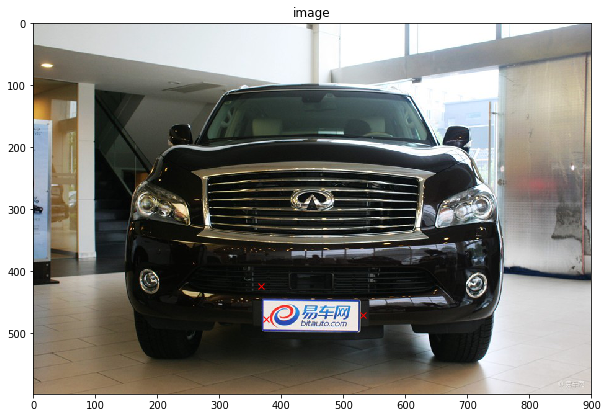

In [5]:
# coord.append(point_refer(coord))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img, cmap='gray')
ax.set_title('image')
for x,y in coord:
    ax.plot(x,y, marker='x',color='r')

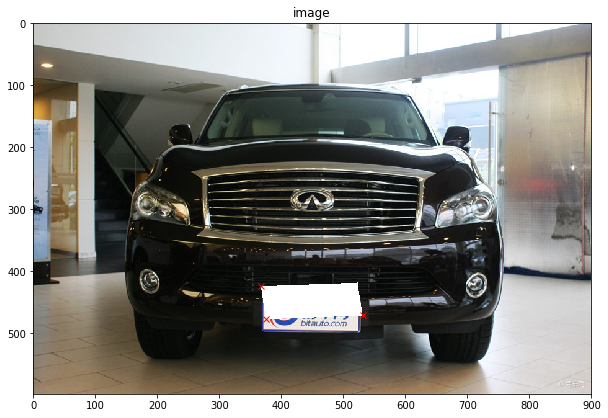

In [6]:
copy_img = mask_rect(img, coord)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(copy_img, cmap='gray')
ax.set_title('image')
for x,y in coord:
    ax.plot(x,y, marker='x',color='r')

# ROI conformation

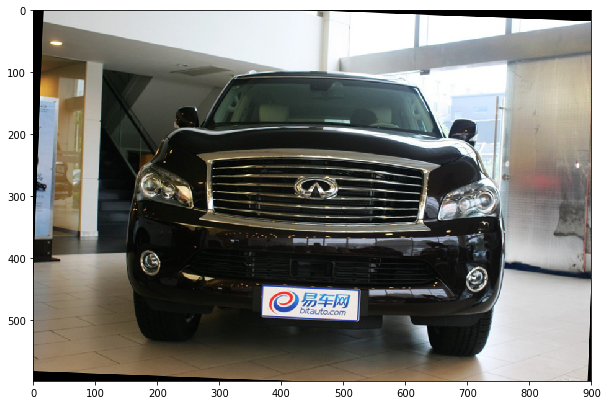

In [7]:
up_middle, angle, bbox = bound_box(coord)
rotated_img = transform.rotate(img,angle = angle,center = up_middle[::-1])

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(rotated_img, cmap='gray')
    

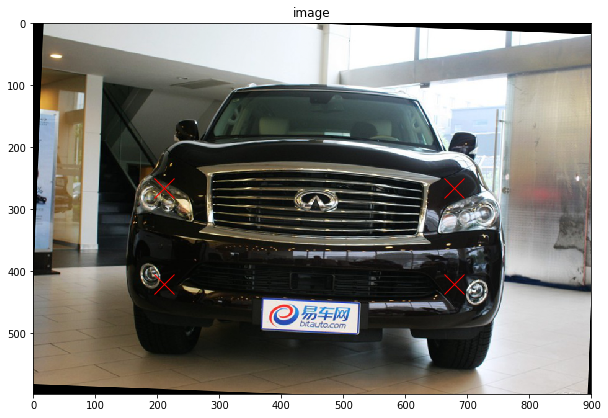

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(rotated_img, cmap='gray')
ax.set_title('image')
for x,y in bbox:
    ax.plot(x,y, marker='x',color='r',markersize =20)

[[211, 421], [679, 421], [211, 265], [679, 265]]


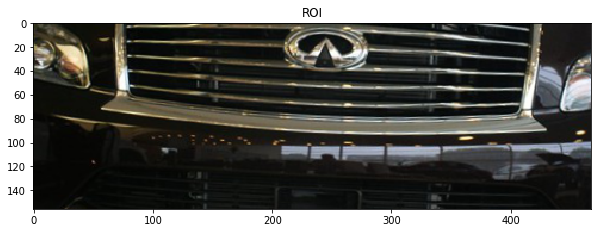

In [9]:
print (bbox)
ROI = rotated_img[bbox[2][1]:bbox[0][1],bbox[0][0]:bbox[1][0]]

# ROI = img_resize(ROI, height=200, width=400)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(ROI, cmap='gray')
ax.set_title('ROI')
imsave('./test_ROI.jpg', ROI)